## Music Classification
This program finds the similarity between two songs by using the song's content. The main features that will be used to determine the similarity between two songs will be tempo of the songs and when beats occur, the percussive rythm, and the sequence of notes played

In [41]:
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data

In [42]:
import librosa

In [43]:
# Load the audio as a waveform `y`, store the sampling rate as `sr`
y, sr = librosa.load("music files/2Pac - can't c me.wav")

In [3]:
print("Number of Samples: {:d}".format(y.shape[0]))
print("Sampling Rate is: {:d} samples/sec".format(sr))

Number of Samples: 7293072
Sampling Rate is: 22050 samples/sec


### Extract Tempo and Beat Instances
An easy indicator of musical style is the tempo of the song. It sets the rhythm of a song.

In [44]:
# 2. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 3. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

#print('Saving output to beat_times.csv')
#librosa.output.times_csv('beat_times.csv', beat_times)

Estimated tempo: 95.70 beats per minute


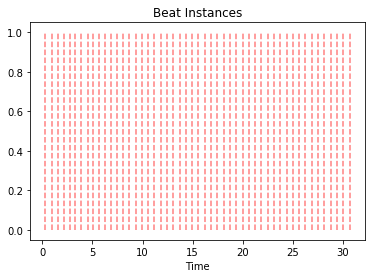

In [45]:
# Time where beats occur
plt.vlines(beat_times[:50], 0, 1, alpha=0.5, color='r',
            linestyle='--', label='Beats')
plt.title("Beat Instances")
plt.xlabel("Time")

### Extract Chroma Data
Chroma in music refers to the presence of the 12 notes humans hear. Another indicator of song style are the notes played. The emotions that a song convey come from the musical scales and note sequences that a song uses. As such, songs have a limited number of notes that are consitently played.

In [46]:
import librosa.display
chroma_cens = librosa.feature.chroma_cens(y=y[500000:600000], sr=sr)
chroma_cq = librosa.feature.chroma_cqt(y=y[500000:600000], sr=sr)

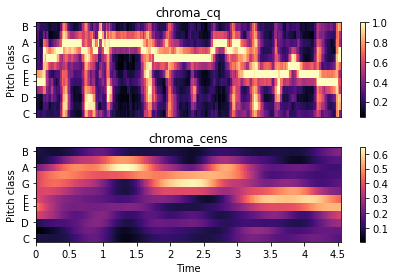

In [47]:
plt.figure()
plt.subplot(2,1,1)
librosa.display.specshow(chroma_cq, y_axis='chroma')
plt.title('chroma_cq')
plt.colorbar()
plt.subplot(2,1,2)
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.title('chroma_cens')
plt.colorbar()
plt.tight_layout()

### Extract Mel Spectrogram
The Mel Spectrogram gives the relative power of an audio source with a scale that closely represents how humans hear sound at different frequencies. In the following examples, the mel spectrogram of two hip-hop songs, two reggaeton songs, and two disco songs are displayed. Some similarities can be seen between each song in each genre.

(128, 14245)


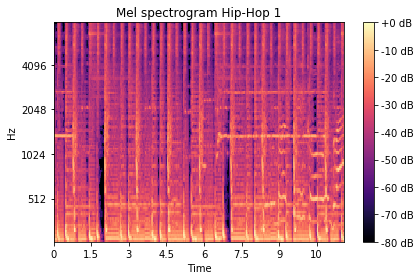

In [48]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
librosa.display.specshow(librosa.logamplitude(S[:,500:1000],ref_power=np.max),
y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram Hip-Hop 1')
plt.tight_layout()
print(S.shape)

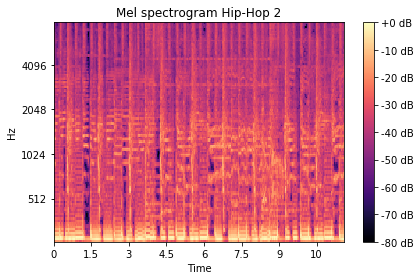

In [49]:
y2, sr2 = librosa.load("music files/Snoop Dogg - who am i.wav")
S = librosa.feature.melspectrogram(y=y2, sr=sr2, n_mels=128, fmax=8000)
librosa.display.specshow(librosa.logamplitude(S[:,500:1000],ref_power=np.max),
y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram Hip-Hop 2')
plt.tight_layout()

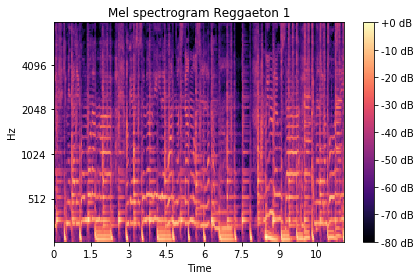

In [51]:
y1, sr1 = librosa.load("music files/Becky G - Mayores.wav")
S = librosa.feature.melspectrogram(y=y1, sr=sr1, n_mels=128, fmax=8000)
librosa.display.specshow(librosa.logamplitude(S[:,500:1000],ref_power=np.max),
y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram Reggaeton 1')
plt.tight_layout()

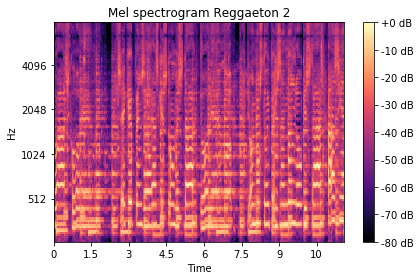

In [52]:
y2, sr2 = librosa.load("music files/Maluma - Felices los 4.wav")
S = librosa.feature.melspectrogram(y=y2, sr=sr2, n_mels=128, fmax=8000)
librosa.display.specshow(librosa.logamplitude(S[:,500:1000],ref_power=np.max),
y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram Reggaeton 2')
plt.tight_layout()

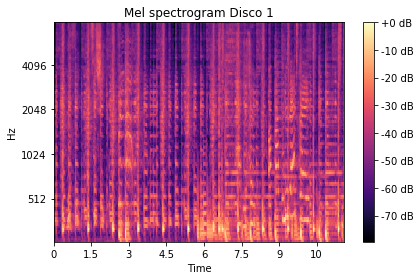

In [53]:
y2, sr2 = librosa.load("music files/Chic - Le Freak.wav")
S = librosa.feature.melspectrogram(y=y2, sr=sr2, n_mels=128, fmax=8000)
librosa.display.specshow(librosa.logamplitude(S[:,500:1000],ref_power=np.max),
y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram Disco 1')
plt.tight_layout()

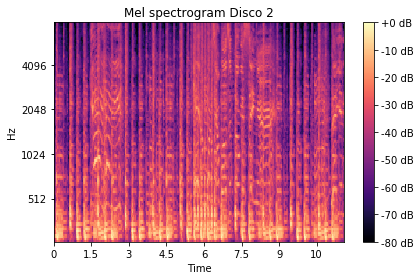

In [54]:
y2, sr2 = librosa.load("music files/Wild Cherry - Play that Funky Music.wav")
S = librosa.feature.melspectrogram(y=y2, sr=sr2, n_mels=128, fmax=8000)
librosa.display.specshow(librosa.logamplitude(S[:,500:1000],ref_power=np.max),
y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram Disco 2')
plt.tight_layout()

##  Correlation of Percussive Elements
The percussion of a song sets the framework for the style/genre of a song. In the following examples the percussion of two reggaeton songs and a rock song are extracted. The first two songs have a similar drum pattern that is seen across all reggaeton songs. 

In [55]:
import IPython.display as ipd

In [57]:
y1, sr1 = librosa.load("music files/Becky G - Mayores.wav")
y2, sr2 = librosa.load("music files/Maluma - Felices los 4.wav")
y3, sr3 = librosa.load("music files/Nirvana - Heart Shaped Box.wav")

In [58]:
y1_percussive = librosa.effects.hpss(y1[500000:1000000], margin=(1.0,5.0))[1]
y2_percussive = librosa.effects.hpss(y2[500000:1000000], margin=(1.0,5.0))[1]
y3_percussive = librosa.effects.hpss(y3[500000:1000000], margin=(1.0,5.0))[1]

In [59]:
#Play a bit of the song
ipd.Audio(y1_percussive, rate=sr1) 

In [60]:
ipd.Audio(y2_percussive, rate=sr2)

In [61]:
ipd.Audio(y3_percussive, rate=sr3)

The percussive audio waveforms are large vectors. Since the goal of this program is to measure similarity between two songs, the correlation of two percussive audio waves is taken to measure similarity of the waveforms. In this example the cross correlation between the two reggaeton songs and one reggaeton song and the rock song are compared

In [62]:
xcorr1 = np.correlate(y1_percussive,y2_percussive, "same")
xcorr2 = np.correlate(y1_percussive,y3_percussive, "same")

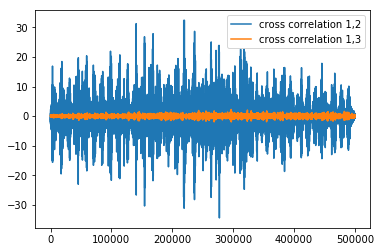

In [63]:
plt.plot(xcorr1, label = 'cross correlation 1,2')
plt.plot(xcorr2, label = 'cross correlation 1,3')
plt.legend()

The cross correlation of the the songs must be standardized otherwise louder songs will have a higher cross correlation.

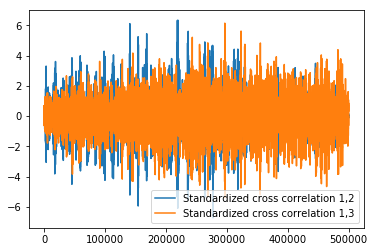

In [22]:
corst1 = (xcorr1-np.mean(xcorr1))/np.std(xcorr1)
corst2 = (xcorr2-np.mean(xcorr2))/np.std(xcorr2)
plt.plot(corst1, label = 'Standardized cross correlation 1,2')
plt.plot(corst2, label = 'Standardized cross correlation 1,3')
plt.legend()

In [47]:
# List of highet peaks. The cross correlation spikes between song 1 and 2 
# are consistently higher
print(np.sort(corst1)[-100:])
print(np.sort(corst2)[-100:])

[ 5.75286055  5.76459074  5.76651144  5.7734952   5.77628469  5.78459549
  5.80057526  5.80141735  5.80475235  5.80963421  5.82577276  5.83137417
  5.83152962  5.83169413  5.8404727   5.84465599  5.8624301   5.86819983
  5.87113333  5.88318586  5.89154577  5.89477253  5.89699602  5.919981
  5.92488289  5.93689632  5.93703842  5.93724108  5.94299173  5.94838476
  5.95001078  5.95312405  5.9598546   5.96550322  5.97985601  5.98530149
  5.98686123  5.98747492  5.99248552  6.00551653  6.00606251  6.00679731
  6.01338053  6.02029848  6.02045441  6.02526665  6.03495741  6.04172182
  6.04899693  6.05174923  6.05251455  6.06185055  6.06666327  6.06701183
  6.07822847  6.08857203  6.09092426  6.09833527  6.10245466  6.10561371
  6.11006689  6.1131916   6.11580515  6.12063074  6.12382364  6.12630844
  6.14166355  6.17425489  6.17428589  6.17465925  6.17525721  6.18079758
  6.19678926  6.20750475  6.21128702  6.21212196  6.22576237  6.22847652
  6.23194885  6.2368803   6.24056339  6.24433804  6.2

## Repeat to a Few Frames of Training Data
First we load the expected song similarity rating that is from 0-4. The rows and columns of the excel file are the names of the songs used. The value at row n and column m is the rating of how similar song n and song m are to each other. To eliminate repeated values and song pairs only the top diagonal of the matrix has values. The song similary between song 1 and song 2 is the same between song 2 and song 1 so there is nothing new to gain.

In [64]:
# load dataset that was created
import pandas as pd
df = pd.read_excel('Song Correlation Groups4.xlsx')

In [65]:
df.head()

Nirvana - Heart Shaped Box  \
Social Casualty - 5 Seconds Of Summer                         4.0   
Alice in Chains - Rooster                                     NaN   
Chic - Le Freak                                               NaN   
Wild Cherry - Play that Funky Music                           NaN   
Chicago - 25 or 6 to 4                                        NaN   

                                       Alice in Chains - Rooster  \
Social Casualty - 5 Seconds Of Summer                        4.0   
Alice in Chains - Rooster                                    4.0   
Chic - Le Freak                                              NaN   
Wild Cherry - Play that Funky Music                          NaN   
Chicago - 25 or 6 to 4                                       NaN   

                                       Chic - Le Freak  \
Social Casualty - 5 Seconds Of Summer              2.0   
Alice in Chains - Rooster                          2.0   
Chic - Le Freak                                    4.0   
Wild Cherry - Play that Funky Music                NaN   
Chicago - 25 or 6 to 4                             NaN   

                                       Wild Cherry - Play that Funky Music  \
Social Casualty - 5 Seconds Of Summer                                  2.0   
Alice in Chains - Rooster                                              2.0   
Chic - Le Freak                                                        4.0   
Wild Cherry - Play that Funky Music                                    4.0   
Chicago - 25 or 6 to 4                                                 NaN   

                                       Chicago - 25 or 6 to 4  \
Social Casualty - 5 Seconds Of Summer                     2.0   
Alice in Chains - Rooster                                 2.0   
Chic - Le Freak                                           1.0   
Wild Cherry - Play that Funky Music                       2.0   
Chicago - 25 or 6 to 4                                    4.0   

                                       Green Day - Brain Stew  \
Social Casualty - 5 Seconds Of Summer                     3.0   
Alice in Chains - Rooster                                 3.0   
Chic - Le Freak                                           1.0   
Wild Cherry - Play that Funky Music                       1.0   
Chicago - 25 or 6 to 4                                    3.0   

                                       Becky G - Mayores  \
Social Casualty - 5 Seconds Of Summer                0.0   
Alice in Chains - Rooster                            0.0   
Chic - Le Freak                                      1.0   
Wild Cherry - Play that Funky Music                  1.0   
Chicago - 25 or 6 to 4                               0.0   

                                       Maluma - Felices los 4  \
Social Casualty - 5 Seconds Of Summer                     0.0   
Alice in Chains - Rooster                                 0.0   
Chic - Le Freak                                           1.0   
Wild Cherry - Play that Funky Music                       1.0   
Chicago - 25 or 6 to 4                                    0.0   

                                       Kool & The Gang - Get Down On it  \
Social Casualty - 5 Seconds Of Summer                               1.0   
Alice in Chains - Rooster                                           1.0   
Chic - Le Freak                                                     4.0   
Wild Cherry - Play that Funky Music                                 4.0   
Chicago - 25 or 6 to 4                                              0.0   

                                       Gloria Gaynor - I Will Survive  \
Social Casualty - 5 Seconds Of Summer                             1.0   
Alice in Chains - Rooster                                         1.0   
Chic - Le Freak                                                   4.0   
Wild Cherry - Play that Funky Music                               4.0   
Chicago - 25 or 6 to 4                         

In [66]:
# song titles
df.columns.values

array(['Nirvana - Heart Shaped Box', 'Alice in Chains - Rooster',
       'Chic - Le Freak', 'Wild Cherry - Play that Funky Music',
       'Chicago - 25 or 6 to 4', 'Green Day - Brain Stew',
       'Becky G - Mayores', 'Maluma - Felices los 4',
       'Kool & The Gang - Get Down On it',
       'Gloria Gaynor - I Will Survive', 'J Balvin - Ay Vamos',
       'Ozuna - Dile Que Tu Me Quieres',
       'Weezer - Undone -- The Sweater Song',
       'The Pixies - Where Is My Mind', 'The Smashing Pumpkins - Today',
       'Social Casualty - 5 Seconds Of Summer',
       "Fall Out Boy - Sugar, We're Goin Down",
       'Panic At The Disco - This Is Gospel',
       'Blink-182 - All The Small Things', 'Good Charlotte - The Anthem',
       'Enrique Iglesias - Subeme La Radio',
       'Luis Fonsi - Echame La Culpa', 'Bee Gees - Night Fever',
       'Bee Gees - You Should Be Dancing', 'Blondie - Heart of Glass',
       'Lipps Inc - Funkytown', 'Daft Punk - Get Lucky'], dtype=object)

In [67]:
# Frame size 
nfft = 22050

In [100]:
# Function to return a vector of song parameters and the percussive elements
def getx(song):
    # load song
    y, sr = librosa.load("music files/" + song + ".wav")
    
    # take frames to do calculations of the middle of a song, after any intros
    nframe = 60
    ycrop = y[nframe*nfft:(nframe+40)*nfft]
    
    # tempo features. Beat_frames are the samples where a strong beat occurs
    tempo, beat_frames = librosa.beat.beat_track(y=ycrop, sr=sr)
    # array beats is created so each song has the same length for x
    # beats = 0 unless a strong beat occurs at samples given from beat_frames
    #beats = np.zeros((ycrop.shape))  
    #beats[beat_frames] = 1            
    
    # percussive features. Will be output seperatly and joined later
    y_percussive = librosa.effects.hpss(ycrop, margin=(1.0,5.0))[1]
    
    # chroma features averaged to represent the most common notes used
    chroma_cq = librosa.feature.chroma_cqt(y=ycrop, sr=sr)
    chroma_cq = np.mean(chroma_cq, axis = 1)
    #chroma_cq = np.ravel(chroma_cq) # flatten the 12 rows
    
    S = librosa.feature.melspectrogram(y=ycrop, sr=sr, n_mels=128, fmax=8000)
    S = np.ravel(S)
    
    # predictor features withour percussive elements
    #xi = np.hstack([sr, tempo, beats, y_percussive, chroma_cq])
    xi = np.hstack([sr, tempo, chroma_cq, S])
    
    return xi, y_percussive
    

In [101]:
# Load all songs and get song parameters
x = []
perc = []
for song in df.columns.values:
    print('loading song: ' + song)
    xi, perci = getx(song)
    x.append(xi)
    perc.append(perci)

loading song: Nirvana - Heart Shaped Box
loading song: Alice in Chains - Rooster
loading song: Chic - Le Freak
loading song: Wild Cherry - Play that Funky Music
loading song: Chicago - 25 or 6 to 4
loading song: Green Day - Brain Stew
loading song: Becky G - Mayores
loading song: Maluma - Felices los 4
loading song: Kool & The Gang - Get Down On it
loading song: Gloria Gaynor - I Will Survive
loading song: J Balvin - Ay Vamos
loading song: Ozuna - Dile Que Tu Me Quieres
loading song: Weezer - Undone -- The Sweater Song
loading song: The Pixies - Where Is My Mind
loading song: The Smashing Pumpkins - Today
loading song: Social Casualty - 5 Seconds Of Summer
loading song: Fall Out Boy - Sugar, We're Goin Down
loading song: Panic At The Disco - This Is Gospel
loading song: Blink-182 - All The Small Things
loading song: Good Charlotte - The Anthem
loading song: Enrique Iglesias - Subeme La Radio
loading song: Luis Fonsi - Echame La Culpa
loading song: Bee Gees - Night Fever
loading song: B

In [158]:
# Turn to array
X = np.array(x)
print(X.shape)
Perc = np.array(perc)
print(Perc.shape)

(27, 220558)
(27, 882000)


In [156]:
# Pickle to save x in case we expand it later
import pickle

with open("x.p", "wb") as fp:
    pickle.dump(x,fp)
    
with open("perc.p", "wb") as fp:
    pickle.dump(perc,fp)    

In [157]:
# Load X
with open("x.p", "rb") as fp:
    x = pickle.load(fp)
    
with open("perc.p", "rb") as fp:
    perc = pickle.load(fp)

In [103]:
# Y matrix listing likeness values (just extracted values from excel, not correct for neural network input)

y = np.array(df)
print(y[:10,:10])

[[  4.   4.   2.   2.   2.   3.   0.   0.   1.   1.]
 [ nan   4.   2.   2.   2.   3.   0.   0.   1.   1.]
 [ nan  nan   4.   4.   1.   1.   1.   1.   4.   4.]
 [ nan  nan  nan   4.   2.   1.   1.   1.   4.   4.]
 [ nan  nan  nan  nan   4.   3.   0.   0.   0.   0.]
 [ nan  nan  nan  nan  nan   4.   0.   0.   0.   0.]
 [ nan  nan  nan  nan  nan  nan   4.   4.   1.   1.]
 [ nan  nan  nan  nan  nan  nan  nan   4.   0.   0.]
 [ nan  nan  nan  nan  nan  nan  nan  nan   4.   4.]
 [ nan  nan  nan  nan  nan  nan  nan  nan  nan   4.]]


In [104]:
# Turn y into a vector

i = 0
j = 0
n = y.shape[0] #number of rows/columns
ind = 0

yvect = np.zeros((np.sum(range(n+1)),1)) 
order = np.zeros((np.sum(range(n+1)),2))

for i in range(n):
    for j in range(i,n):
        yvect[ind] = y[i,j]
        
        # to keep track of which song #s correspond to yvect indices
        order[ind] = np.array([i,j])
        ind = ind + 1

In [105]:
# Example of yvect and order

print('Target variable and corresponding song pair')
print('\ty\t\tsongs')
for i in range(10,20):
    print('\t%d'%yvect[i]+'\t\t%d, %d'%(order[i,0],order[i,1]))

Target variable and corresponding song pair
	y		songs
	0		0, 10
	0		0, 11
	3		0, 12
	3		0, 13
	3		0, 14
	3		0, 15
	3		0, 16
	3		0, 17
	3		0, 18
	3		0, 19


## Generating the predictors
The matrix X contains all the musical features of each song. y is the target variable for each possible song pair that is non-repeating. Therefore each corresponding predictor vector should contain the features from the two songs of that pair. For example, the song similary between song 1 and song 2 would have a predictor vector of both song 1 and 2 features stacked.

In [106]:
# Generate the final predictor vectors based on the song pairs
# This includes all the 'x' paramters and the cross correlation
# peaks of the percussive audio

ncomb = yvect.shape[0] #total number of non repeated song pairs
npeak = 1000 #number of peaks to save from standardized cross correlation
Xcomb = np.zeros((ncomb, X.shape[1]*2+npeak))
#Pcomb = np.zeros((ncomb, Perc.shape[1]*2))
for i in range(order.shape[0]):
    
    print('iteration %d of %d' %(i, order.shape[0]-1))
        
    # find cross correlation between the percussive elements of the two songs given by 'order'
    # Since drum beats are usually constant only a small porttion of correlation is found
    xcorr = np.correlate(Perc[int(order[i,0]),:nfft*1],Perc[int(order[i,1]),:nfft*1], "same")
    xcorst = (xcorr-np.mean(xcorr))/np.std(xcorr)
    xcorpk = np.sort(xcorst)[-npeak:]
    
    # Xcomb takes the features from the two songs 
    Xcomb[i] = np.hstack((X[int(order[i,0]),:],  X[int(order[i,1]),:], xcorpk))

iteration 0 of 377
iteration 1 of 377
iteration 2 of 377
iteration 3 of 377
iteration 4 of 377
iteration 5 of 377
iteration 6 of 377
iteration 7 of 377
iteration 8 of 377
iteration 9 of 377
iteration 10 of 377
iteration 11 of 377
iteration 12 of 377
iteration 13 of 377
iteration 14 of 377
iteration 15 of 377
iteration 16 of 377
iteration 17 of 377
iteration 18 of 377
iteration 19 of 377
iteration 20 of 377
iteration 21 of 377
iteration 22 of 377
iteration 23 of 377
iteration 24 of 377
iteration 25 of 377
iteration 26 of 377
iteration 27 of 377
iteration 28 of 377
iteration 29 of 377
iteration 30 of 377
iteration 31 of 377
iteration 32 of 377
iteration 33 of 377
iteration 34 of 377
iteration 35 of 377
iteration 36 of 377
iteration 37 of 377
iteration 38 of 377
iteration 39 of 377
iteration 40 of 377
iteration 41 of 377
iteration 42 of 377
iteration 43 of 377
iteration 44 of 377
iteration 45 of 377
iteration 46 of 377
iteration 47 of 377
iteration 48 of 377
iteration 49 of 377
iteration 

In [107]:
# Keras libraries

import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Activation

In [108]:
# Data Splitting

ntr = round((7/10)*ncomb)
Iperm = np.random.permutation(ncomb) #random permutation of all X sample rows
train = Iperm[:ntr]
test = Iperm[ntr:]
Xtr = Xcomb[train,:]
ytr = yvect[train]
Xts = Xcomb[test,:]
yts = yvect[test]

In [109]:
from keras.models import Model, Sequential
from keras.layers import Dense, Activation

In [116]:
# Keras Clear Session
import keras.backend as K
K.clear_session()

In [117]:
# Neural Network Model

nin = Xtr.shape[1]
nh = 50
nout = int(np.max(ytr+1)) 
model = Sequential()
model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(nout, activation = 'softmax',name='output'))

In [118]:
# Print Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 50)                22105850  
_________________________________________________________________
output (Dense)               (None, 5)                 255       
Total params: 22,106,105
Trainable params: 22,106,105
Non-trainable params: 0
_________________________________________________________________


In [119]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        # TODO:  Create two empty lists, self.loss and self.val_acc
        self.loss = []
        self.val_acc = []
 
    def on_batch_end(self, batch, logs={}):
        # TODO:  This is called at the end of each batch.  
        # Add the loss in logs.get('loss') to the loss list
        self.loss.append(logs.get('loss'))
        
    def on_epoch_end(self, epoch, logs):
        # TODO:  This is called at the end of each epoch.  
        # Add the test accuracy in logs.get('val_acc') to the val_acc list
        self.val_acc.append(logs.get('val_acc'))

# Create an instance of the history callback
history_cb = LossHistory()

In [120]:
from keras import optimizers

opt = optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [121]:
model.fit(Xtr, ytr, epochs=10, batch_size=100, validation_data=(Xts,yts), callbacks=[history_cb])

Train on 265 samples, validate on 113 samples
Epoch 1/10
265/265 [==============================] - 7s 26ms/step - loss: 1.5857 - acc: 0.2679 - val_loss: 1.6566 - val_acc: 0.2389
Epoch 2/10
265/265 [==============================] - 5s 20ms/step - loss: 1.5750 - acc: 0.2491 - val_loss: 1.6341 - val_acc: 0.2478
Epoch 3/10
265/265 [==============================] - 5s 20ms/step - loss: 1.5353 - acc: 0.2792 - val_loss: 1.6119 - val_acc: 0.2301
Epoch 4/10
265/265 [==============================] - 5s 20ms/step - loss: 1.5303 - acc: 0.2830 - val_loss: 1.6016 - val_acc: 0.2566
Epoch 5/10
265/265 [==============================] - 5s 19ms/step - loss: 1.5242 - acc: 0.3057 - val_loss: 1.5820 - val_acc: 0.2832
Epoch 6/10
265/265 [==============================] - 5s 19ms/step - loss: 1.5134 - acc: 0.3283 - val_loss: 1.5824 - val_acc: 0.2743
Epoch 7/10
265/265 [==============================] - 5s 17ms/step - loss: 1.5085 - acc: 0.3358 - val_loss: 1.5833 - val_acc: 0.2655
Epoch 8/10
265/265 [===

In [138]:
# Find predicted y values from test data

yhatprob = model.predict(Xts)
yhat = np.argmax(yhatprob, axis =1)

In [155]:
# 1 where array value is 4 or 3 and 0 for other value
# A 3 or 4 is good enough to recommend a song to a user

yhat4 = np.ravel((((yhat == 4)) | (yhat == 3))*1)
yts4 = np.ravel(((yts == 4) | (yts == 3))*1)

yerr = yhat4 & yts4

print('The accuracy of finding a similar song: %0.3f'%(np.sum(yerr)/yhat.shape[0]))
# song pairs where yhat == 4 and yts = 4
yerrloc = np.where(yerr == 1)
yerrloc = np.ravel(yerrloc)

if (len(yerrloc) > 0):
    i = 0
    if (len(yerrloc) < 24):
        maxi = len(yerrloc)
    else:
        maxi = 24
    
    print('Target variable and corresponding song pair')
    print('\tsongs\t\ty\t\tyhat')
    while (i < maxi):
        print("\t%d, %d\t\t%d\t\t%d" %(order[test[yerrloc[i]]][0], order[test[yerrloc[i]]][1],yts[yerrloc[i]],
                                      yhat[yerrloc[i]]))
        i += 1
else:
    print("No such error found")

# order gives song index, test gives index used for testing order pairs
print('\nOne example of Songs that are recommended as similar\n%s & %s'%(
                            df.columns.values[int(order[test[yerrloc[0]]][0])], 
                            df.columns.values[int(order[test[yerrloc[0]]][1])]))

The accuracy of finding a similar song: 0.212
Target variable and corresponding song pair
	songs		y		yhat
	9, 23		3		4
	24, 24		4		4
	6, 21		4		4
	9, 22		3		4
	6, 11		4		4
	23, 24		4		4
	8, 22		4		4
	15, 16		4		4
	7, 11		4		4
	26, 26		4		4
	14, 15		3		4
	5, 17		3		4
	18, 18		4		4
	10, 10		4		4
	1, 18		3		4
	2, 22		4		4
	19, 19		4		4
	9, 9		4		4
	12, 17		3		4
	11, 20		4		4
	3, 9		4		4
	3, 22		4		4
	14, 17		3		4
	11, 21		4		4

One example of Songs that are recommended as similar
Gloria Gaynor - I Will Survive & Bee Gees - You Should Be Dancing


In [140]:
# Falso positives
# subtract so 1 means yhat == 4 and yts != 4
#            -1 means yhat != 4 and yts == 4
yerr = yhat4 - yts4

# song pairs where yhat == 4 and yts != 4
yerrloc = np.where(yerr == 1)
yerrloc = np.ravel(yerrloc)

if (len(yerrloc) > 0):
    i = 0
    if (len(yerrloc) < 24):
        maxi = len(yerrloc)
    else:
        maxi = 24
    
    print('Target variable and corresponding song pair')
    print('\tsongs\t\ty\t\tyhat')
    while (i < maxi):
        print("\t%d, %d\t\t%d\t\t%d" %(order[test[yerrloc[i]]][0], order[test[yerrloc[i]]][1],yts[yerrloc[i]],
                                      yhat[yerrloc[i]]))
        i += 1
else:
    print("No such error found")
    

Target variable and corresponding song pair
	songs		y		yhat
	15, 20		1		4
	1, 3		2		4
	15, 25		1		4
	21, 25		1		4
	0, 24		2		4
	3, 19		1		4
	17, 26		1		4
	5, 21		0		4
	21, 23		1		4
	17, 21		1		4
	18, 24		1		4
	7, 26		1		4
	21, 24		1		4
	2, 10		0		4
	3, 5		1		4
	3, 21		2		4
	4, 19		2		4
	8, 11		0		4
	17, 24		1		4
	2, 4		1		4
	1, 4		2		4
	20, 25		0		4
	0, 8		1		4
	1, 10		0		4


In [141]:
# False negatives
# -1 means yhat != 4 and yts == 4
yerrloc = np.array(np.where(yerr == -1))
yerrloc = np.ravel(yerrloc)

if (len(yerrloc) > 0):
    i = 0
    if (len(yerrloc) < 24):
        maxi = len(yerrloc)
    else:
        maxi = 24
    print('Target variable and corresponding song pair')
    print('\tsongs\t\ty\t\tyhat')
    while (i < maxi):
        print("\t%d, %d\t\t%d\t\t%d" %(order[test[yerrloc[i]]][0], order[test[yerrloc[i]]][1],yts[yerrloc[i]],
                                      yhat[yerrloc[i]]))
        i += 1
else:
    print("No such error found")

Target variable and corresponding song pair
	songs		y		yhat
	16, 18		4		1
	16, 16		4		0
	1, 5		3		0
	5, 13		3		0
	0, 16		3		0
	5, 14		4		1
	2, 24		4		0
	13, 16		3		0
	10, 20		4		0
	22, 24		4		0
	12, 18		4		1
	13, 14		4		1
	6, 7		4		0
	1, 13		3		0
	4, 24		3		0
	4, 16		3		0
	14, 16		3		0
	8, 25		4		1
	4, 25		3		1


In [142]:
# Correctly labeled low values
# 1 where yhat and yts < 2 
yhat34 = np.ravel((yhat < 2)*1)
yts34 = np.ravel((yts < 2 )*1)

yerr = (yhat != yts) & (yhat34 & yts34)
yerrloc = np.array(np.where(yerr == -1))
yerrloc = np.ravel(yerrloc)

if (len(yerrloc) > 0):
    i = 0
    if (len(yerrloc) < 24):
        maxi = len(yerrloc)
    else:
        maxi = 24
    print('Target variable and corresponding song pair')
    print('\tsongs\t\ty\t\tyhat')
    while (i < maxi):
        print("\t%d, %d\t\t%d\t\t%d" %(order[test[yerrloc[i]]][0], order[test[yerrloc[i]]][1],yts[yerrloc[i]],
                                      yhat[yerrloc[i]]))
        i += 1
else:
    print("No such error found")

No such error found
